## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

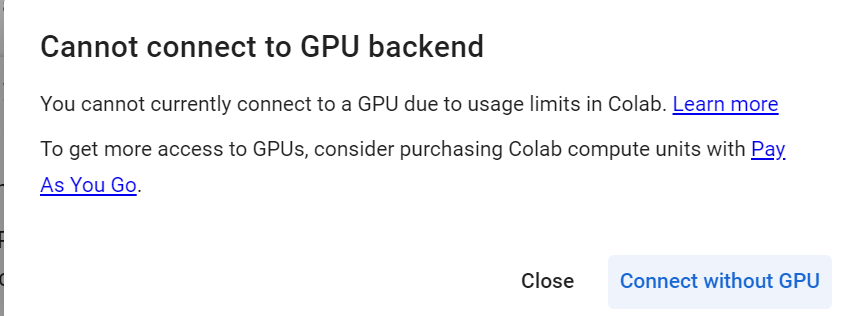

## **Installing and Importing Necessary Libraries**

In [ ]:
# installing the libraries
!pip install -U sentence-transformers==4.0.2 gensim==4.3.3 transformers==4.50.3 tqdm==4.67.1 scikit-learn==1.6.1 pandas==2.2.2 numpy==1.26.4 matplotlib==3.10.0 seaborn==0.13.2 -q

Install the necessary liberaries such as Sentence-transformers er etc required for this code

In [ ]:
pip install openai # We will also install OPenAIs API for word embeddings Lets see if time permits for OpenAI connection

In [ ]:
# to read and manipulate the data
import numpy as np
import pandas as pd

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# to create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# to import Word2Vec
from gensim.models import Word2Vec

# to split data into train and test sets
from sklearn.model_selection import train_test_split

# to build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# to compute metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# To tune different models
from sklearn.model_selection import GridSearchCV


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## **Loading the dataset**

In [ ]:
data = pd.read_csv('/content/stock_news.csv')

In [ ]:
# As a good practice lets now create a copy of the Input data
df = data.copy()

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Load the data into a dataframe and create a local copy as back up

## **Data Overview**

In [ ]:
df.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


visualising the first 5 records of the data doesnt seem to show any anomalies

In [ ]:
df.shape

(349, 8)

The data has 349 records and 8 columns which is too small for building any meaningful machine learning model.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,349.0,4.622923e+01,6.442817e+00,3.756750e+01,4.174000e+01,4.597500e+01,5.070750e+01,6.681750e+01
High,349.0,4.670046e+01,6.507321e+00,3.781750e+01,4.224500e+01,4.602500e+01,5.085000e+01,6.706250e+01
Low,349.0,4.574539e+01,6.391976e+00,3.730500e+01,4.148250e+01,4.564000e+01,4.977750e+01,6.586250e+01
Close,349.0,4.492632e+01,6.398338e+00,3.625413e+01,4.024691e+01,4.459692e+01,4.911079e+01,6.480523e+01
Volume,349.0,1.289482e+08,4.317031e+07,4.544800e+07,1.032720e+08,1.156272e+08,1.511252e+08,2.444392e+08
Label,349.0,-5.444126e-02,7.151192e-01,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    349 non-null    object 
 1   News    349 non-null    object 
 2   Open    349 non-null    float64
 3   High    349 non-null    float64
 4   Low     349 non-null    float64
 5   Close   349 non-null    float64
 6   Volume  349 non-null    int64  
 7   Label   349 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ KB


Date field is in onject format and will have to be converted to date format for any meaningful assessment. There seem to be no empty fields

In [ ]:
df.isnull().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


We confirmed that there are no null records

In [ ]:
df.duplicated().sum()

0

There are no duplicate records either!

## **Exploratory Data Analysis**

### Univariate Analysis

* Distribution of individual variables
* Compute and check the distribution of the length of news content

<Axes: xlabel='Label', ylabel='count'>

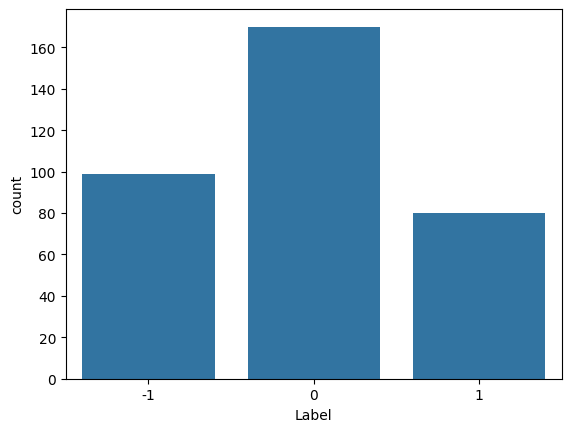

In [ ]:
sns.countplot(data=df, x='Label')

The Number of neutral news are clearly more than both the positive and negative news

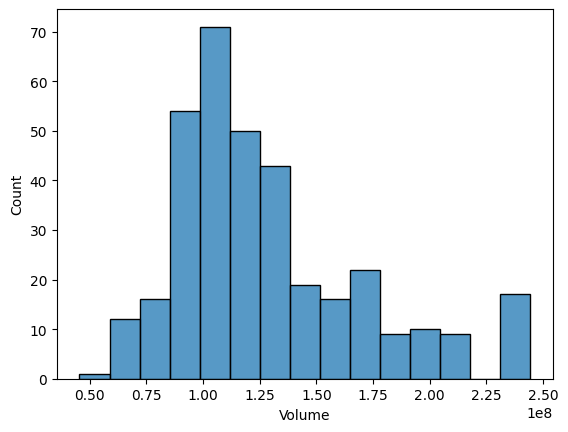

In [ ]:
sns.histplot(data=df, x='Volume');

Volume data shows a slight right skew.

In [ ]:
df.nunique()

,0
Date,71
News,349
Open,70
High,70
Low,71
Close,71
Volume,71
Label,3


There are 71 unique dates but 329 unique news which means that there are more than 1 news on some days.

In [ ]:
df['Label'].value_counts()

,count
Label,
0,170
-1,99
1,80


There are 170 neutral news, 99 negative and 80 positive news. The data is not balanced.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

Lets convert the date field from string to Datetime format

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    349 non-null    datetime64[ns]
 1   News    349 non-null    object        
 2   Open    349 non-null    float64       
 3   High    349 non-null    float64       
 4   Low     349 non-null    float64       
 5   Close   349 non-null    float64       
 6   Volume  349 non-null    int64         
 7   Label   349 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 21.9+ KB


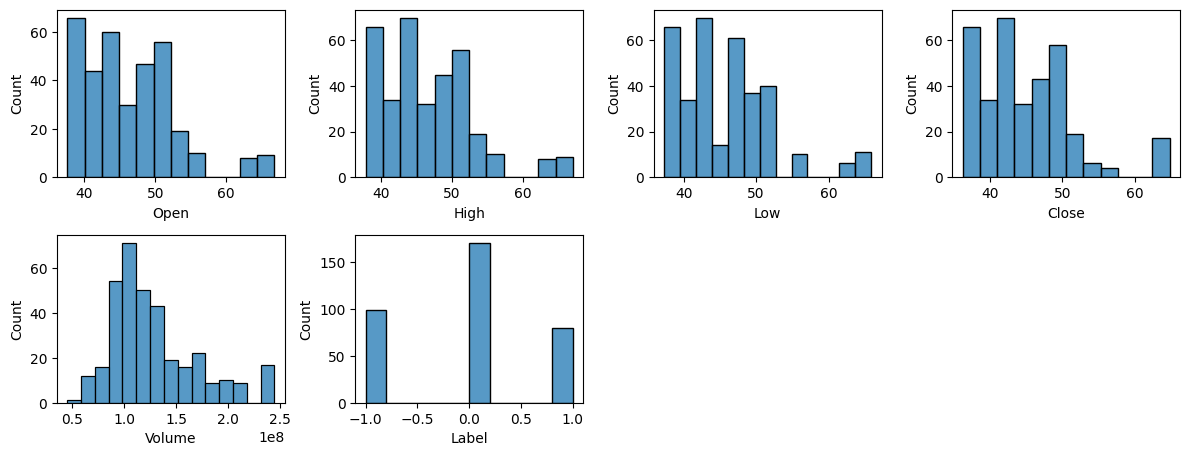

In [ ]:
# defining the figure size
plt.figure(figsize=(12, 11))

# plotting the histogram for each numerical feature
for i, feature in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(5, 4, i+1)    # assign a subplot in the main plot
    sns.histplot(data=df, x=feature)    # plot the histogram

plt.tight_layout();   # to add spacing between plots

* The stock prices look identical in nature in terms of distribution with slight variations
* volume data has a slight right skew
* Neutral news are more than the negative and positive news

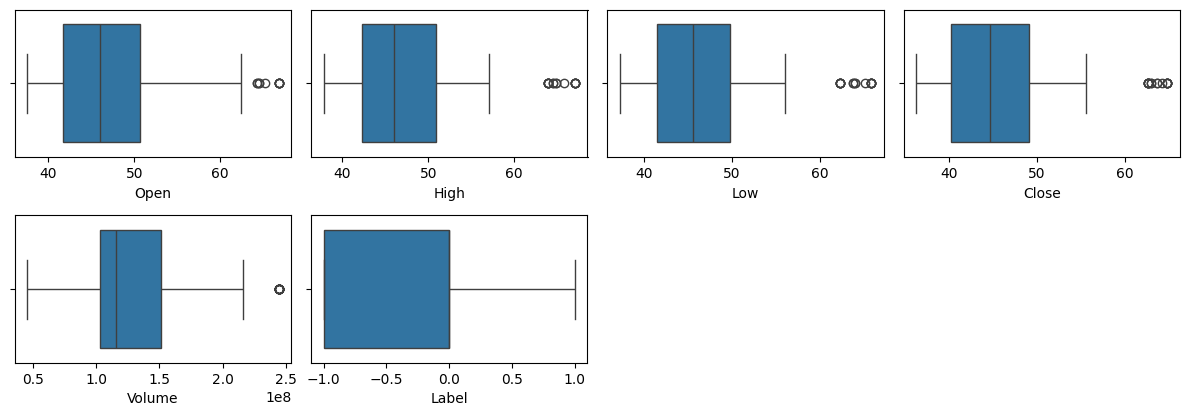

In [ ]:
# defining the figure size
plt.figure(figsize=(12, 10))

# plotting the histogram for each numerical feature
for i, feature in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(5, 4, i+1)    # assign a subplot in the main plot
    sns.boxplot(data=df, x=feature)    # plot the boxplots

plt.tight_layout();   # to add spacing between plots

* The stock price have all outliers above the upper quartiles
* The right skew on volume is confirmed by box plot too and volume too has an  outline on the upper end.

### Bivariate Analysis

* Correlation
* Sentiment Polarity vs Price
* Date vs Price

**Note**: The above points are listed to provide guidance on how to approach bivariate analysis. Analysis has to be done beyond the above listed points to get maximum scores.

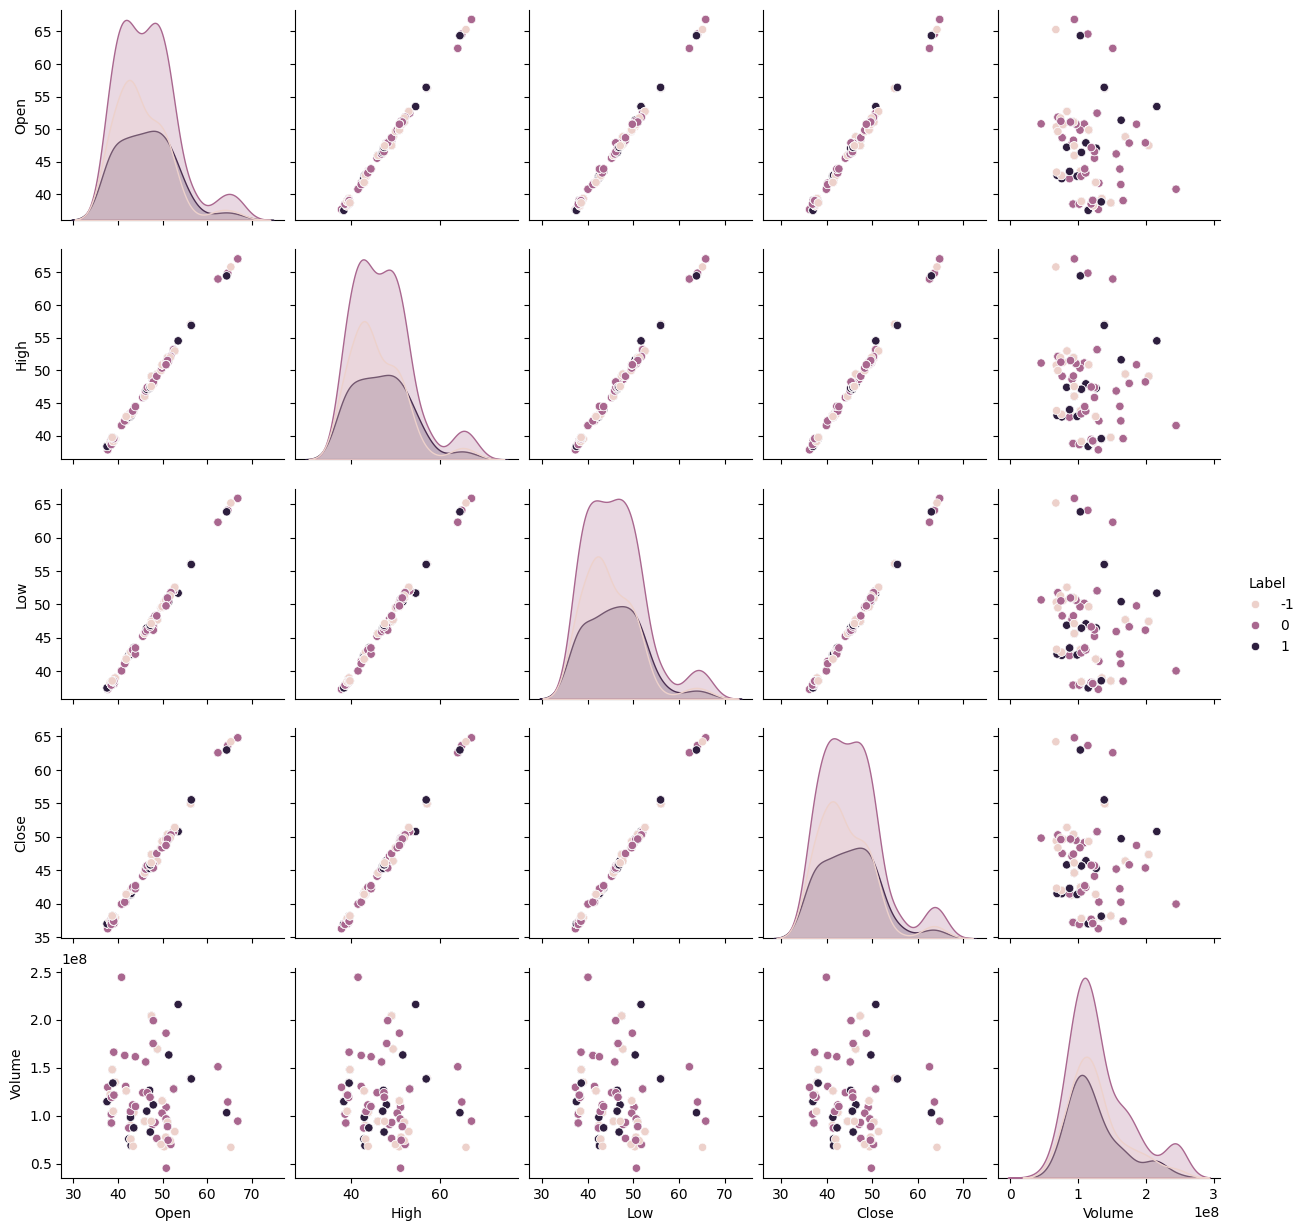

In [ ]:
sns.pairplot(df, hue='Label', diag_kind='kde');

* All the price fields have a very high positive correlation as can be seen from the scatter plots
* Volume field doesnt seem to be correlated to any data point

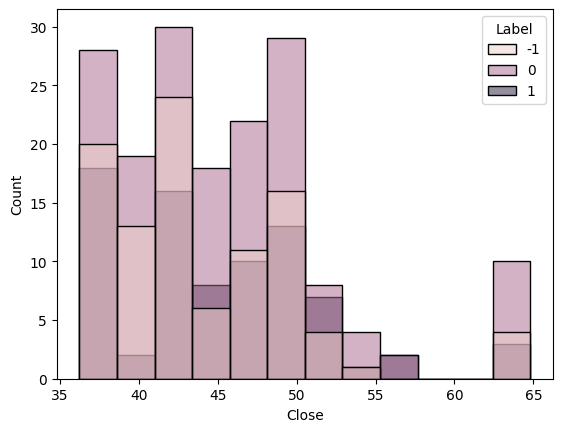

In [ ]:
sns.histplot(data=df, x='Close', hue='Label');

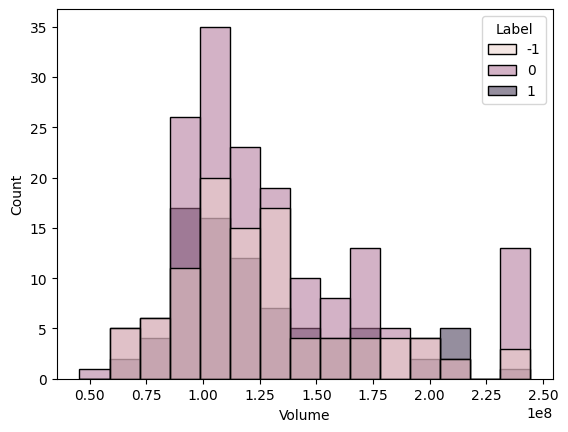

In [ ]:
sns.histplot(data=df, x='Volume', hue='Label');

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

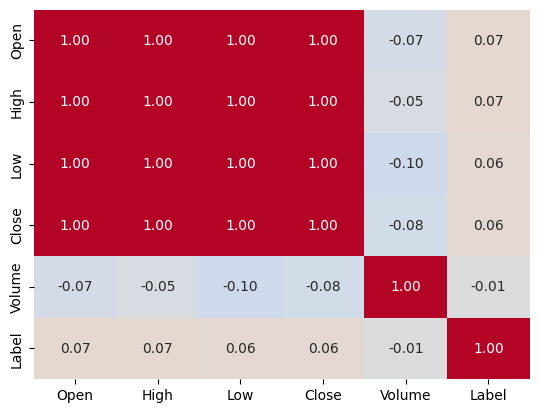

In [ ]:
sns.heatmap(data=numeric_df.corr(), cmap='coolwarm', vmin=-1, fmt='.2f', vmax=1,annot=True, cbar=False);

* As can be seen the stock prices are highly correlated with one another,
* whereas the label and Volume columns do not any co-relation with any other data elements

## **Data Preprocessing**

##Bag Of Words Embeddings

Lets now generate the word embeddings using the Bag of words technique

### Removing special characters from the text

In [ ]:
# defining a function to remove special characters
def remove_special_characters(text):
    # Defining the regex pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z0-9]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

In [ ]:
# Applying the function to remove special characters
df['cleaned_text'] = df['News'].apply(remove_special_characters)

The column 'cleaned_text' now has only appha numeric fields

In [ ]:
# checking a couple of instances of cleaned data
df.loc[0:3, ['News','cleaned_text']]

,News,cleaned_text
0,The tech sector experienced a significant dec...,The tech sector experienced a significant dec...
1,Apple lowered its fiscal Q1 revenue guidance ...,Apple lowered its fiscal Q1 revenue guidance ...
2,Apple cut its fiscal first quarter revenue fo...,Apple cut its fiscal first quarter revenue fo...
3,This news article reports that yields on long...,This news article reports that yields on long...


In [ ]:
# changing the case of the text data to lower case
df['cleaned_text'] = df['cleaned_text'].str.lower()

In [ ]:
# checking a couple of instances of cleaned data
df.loc[0:3, ['News','cleaned_text']]

,News,cleaned_text
0,The tech sector experienced a significant dec...,the tech sector experienced a significant dec...
1,Apple lowered its fiscal Q1 revenue guidance ...,apple lowered its fiscal q1 revenue guidance ...
2,Apple cut its fiscal first quarter revenue fo...,apple cut its fiscal first quarter revenue fo...
3,This news article reports that yields on long...,this news article reports that yields on long...


In [ ]:
# removing extra whitespaces from the text
df['cleaned_text'] = df['cleaned_text'].str.strip()

In [ ]:
# checking a couple of instances of cleaned data
df.loc[0:3, ['News','cleaned_text']]

,News,cleaned_text
0,The tech sector experienced a significant dec...,the tech sector experienced a significant decl...
1,Apple lowered its fiscal Q1 revenue guidance ...,apple lowered its fiscal q1 revenue guidance t...
2,Apple cut its fiscal first quarter revenue fo...,apple cut its fiscal first quarter revenue for...
3,This news article reports that yields on long...,this news article reports that yields on long ...


In [ ]:
# defining a function to remove stop words using the NLTK library
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text

In [ ]:
# Applying the function to remove stop words using the NLTK library
df['cleaned_text_without_stopwords'] = df['cleaned_text'].apply(remove_stopwords)

In [ ]:
# checking a couple of instances of cleaned data
df.loc[0:3,['cleaned_text','cleaned_text_without_stopwords']]

,cleaned_text,cleaned_text_without_stopwords
0,the tech sector experienced a significant decl...,tech sector experienced significant decline af...
1,apple lowered its fiscal q1 revenue guidance t...,apple lowered fiscal q1 revenue guidance 84 bi...
2,apple cut its fiscal first quarter revenue for...,apple cut fiscal first quarter revenue forecas...
3,this news article reports that yields on long ...,news article reports yields long dated u treas...


Stemming is a language processing method that chops off word endings to find the root or base form of words.

For example,

* Original Word: Jumping, Stemmed Word: Jump
* Original Word: Running, Stemmed Word: Run

The Porter Stemmer is one of the widely-used algorithms for stemming, and it shorten words to their root form by removing suffixes.

In [ ]:
# Loading the Porter Stemmer
ps = PorterStemmer()

We will use porter stemmer for removing the stem words.

In [ ]:
# defining a function to perform stemming
def apply_porter_stemmer(text):
    # Split text into separate words
    words = text.split()

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    new_text = ' '.join([ps.stem(word) for word in words])

    return new_text

In [ ]:
# Applying the function to perform stemming
df['final_cleaned_text'] = df['cleaned_text_without_stopwords'].apply(apply_porter_stemmer)

In [ ]:
# checking a couple of instances of cleaned data
df.loc[0:3,['cleaned_text_without_stopwords','final_cleaned_text']]

,cleaned_text_without_stopwords,final_cleaned_text
0,tech sector experienced significant decline af...,tech sector experienc signific declin aftermar...
1,apple lowered fiscal q1 revenue guidance 84 bi...,appl lower fiscal q1 revenu guidanc 84 billion...
2,apple cut fiscal first quarter revenue forecas...,appl cut fiscal first quarter revenu forecast ...
3,news article reports yields long dated u treas...,news articl report yield long date u treasuri ...


### Count Vectorizer

* We'll use the CountVectorizer class of sklearn to vectorize the data using Bag of Words (BoW).

* We first create the document-term matrix, where each value in the matrix stores the count of a term in a document.

* We then consider only the top n terms by frequency

* *n* is a hyperparameter that one can change and experiment with

In [ ]:
# Initializing CountVectorizer with top 1000 words
bow_vec = CountVectorizer(max_features = 1000)

# Applying TfidfVectorizer on data
data_features_BOW = bow_vec.fit_transform(df['final_cleaned_text'])

# Convert the data features to array
data_features_BOW = data_features_BOW.toarray()

# Shape of the feature vector
data_features_BOW.shape

(349, 1000)

the data_features now has all the news converted into vector format of 1000 features/tokens

In [ ]:
# Getting the 1000 words considered by the BoW model
words = bow_vec.get_feature_names_out()

In [ ]:
# Checking the words considered by BoW model
words

array(['000', '04', '06', '10', '100', '11', '13', '14', '15', '16', '17',
       '18', '20', '200', '201', '2014', '2016', '2017', '2018', '2019',
       '2020', '2023', '21', '22', '225', '24', '25', '250', '26', '28',
       '30', '300', '31', '320', '36', '37', '38', '3d', '40', '44', '49',
       '50', '500', '54', '5g', '60', '600', '67', '737', '75', '800',
       '84', '89', '93', '99', 'aac', 'aapl', 'accept', 'access',
       'accord', 'account', 'accus', 'acknowledg', 'acquisit', 'across',
       'activ', 'ad', 'addit', 'address', 'adjust', 'administr', 'adopt',
       'advanc', 'advantag', 'advertis', 'advis', 'aetna', 'affair',
       'affect', 'agenc', 'agre', 'agreement', 'ahead', 'aid', 'aim',
       'air', 'airpod', 'album', 'alexa', 'alibaba', 'alleg', 'allegedli',
       'allow', 'along', 'alphabet', 'alreadi', 'also', 'am', 'amazon',
       'american', 'amid', 'amidst', 'amount', 'analyst', 'android',
       'announc', 'annual', 'anoth', 'answer', 'anticip', 'antitr

In [ ]:
# Creating a DataFrame from the data features
df_BOW = pd.DataFrame(data_features_BOW, columns=bow_vec.get_feature_names_out())
df_BOW.head()

,000,04,06,10,100,11,13,14,15,16,...,xr,year,yen,yet,yield,york,yoy,yuan,zeux,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


##Word2Vec Embeddings

Let us now use the Word2Vec embedding technique to build word embeddings for the 'News'

In [ ]:
# creating a list of all words in our data
words_list = [item.split(" ") for item in df['News'].values]

In [ ]:
# Checking the words from the first five reviews
words_list[0:5]

[['',
  'The',
  'tech',
  'sector',
  'experienced',
  'a',
  'significant',
  'decline',
  'in',
  'the',
  'aftermarket',
  'following',
  "Apple's",
  'Q1',
  'revenue',
  'warning.',
  'Notable',
  'suppliers,',
  'including',
  'Skyworks,',
  'Broadcom,',
  'Lumentum,',
  'Qorvo,',
  'and',
  'TSMC,',
  'saw',
  'their',
  'stocks',
  'drop',
  'in',
  'response',
  'to',
  "Apple's",
  'downward',
  'revision',
  'of',
  'its',
  'revenue',
  'expectations',
  'for',
  'the',
  'quarter,',
  'previously',
  'announced',
  'in',
  'January.'],
 ['',
  'Apple',
  'lowered',
  'its',
  'fiscal',
  'Q1',
  'revenue',
  'guidance',
  'to',
  '$84',
  'billion',
  'from',
  'earlier',
  'estimates',
  'of',
  '$89-$93',
  'billion',
  'due',
  'to',
  'weaker',
  'than',
  'expected',
  'iPhone',
  'sales.',
  'The',
  'announcement',
  'caused',
  'a',
  'significant',
  'drop',
  'in',
  "Apple's",
  'stock',
  'price',
  'and',
  'negatively',
  'impacted',
  'related',
  'supplier

In [ ]:
# creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

We will build a embeddings using 300 columns

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 4682


In [ ]:
# Checking the word embedding of a random word
word = "drive"
model_W2V.wv[word]

array([-2.5602744e-03,  2.4753553e-03,  1.6989423e-03,  2.1856502e-03,
       -8.3038060e-04,  3.6007742e-04,  3.0972057e-03,  1.7868814e-03,
        8.8583981e-04, -1.5165792e-03,  4.7280546e-04, -9.0987794e-04,
       -1.0240150e-03, -1.8769057e-03, -2.7326288e-04,  1.8952352e-03,
       -1.9329857e-03, -2.1540695e-03,  6.5276743e-04, -2.7575579e-03,
       -1.6176120e-03, -2.6971700e-03, -2.4750591e-03,  2.0052940e-03,
        2.7133222e-03,  3.0433671e-03, -3.6495179e-03, -1.4466607e-03,
        2.4732603e-03,  1.5617450e-03,  2.6579649e-04,  2.6562596e-03,
        1.2024635e-05, -3.6691976e-04,  3.1550613e-03,  1.4515736e-03,
       -1.3485872e-03, -1.9007311e-03,  1.8704935e-03, -2.4770447e-03,
       -4.9723801e-04, -1.4401515e-03, -1.6413850e-03,  1.1206799e-03,
        2.4217353e-03, -1.2953389e-04, -1.6447026e-03, -7.9732767e-04,
        1.3490600e-03, -2.4471278e-03,  5.9475465e-04, -2.4055301e-03,
       -2.1430273e-03,  1.7067927e-03,  2.8647308e-03,  3.6249831e-03,
      

In [ ]:
# Checking top 5 similar words to the word 'review'
similar = model_W2V.wv.similar_by_word('drive', topn=5)
print(similar)

[('banned', 0.27214643359184265), ("there's", 0.24174925684928894), ('Alibaba-backed', 0.23865818977355957), ('unit', 0.23481254279613495), ('rating', 0.22799049317836761)]


In [ ]:
# Dictionary with key as words and the value as the embedding vector.
words = model_W2V.wv.key_to_index

In [ ]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(words[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
df_word2vec = pd.DataFrame(df['News'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_word2vec

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 290,Feature 291,Feature 292,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299
0,1169.577778,1169.577778,1169.577778,1169.577778,1169.577778,1169.577778,1169.577778,1169.577778,1169.577778,1169.577778,...,1169.577778,1169.577778,1169.577778,1169.577778,1169.577778,1169.577778,1169.577778,1169.577778,1169.577778,1169.577778
1,267.260000,267.260000,267.260000,267.260000,267.260000,267.260000,267.260000,267.260000,267.260000,267.260000,...,267.260000,267.260000,267.260000,267.260000,267.260000,267.260000,267.260000,267.260000,267.260000,267.260000
2,411.229167,411.229167,411.229167,411.229167,411.229167,411.229167,411.229167,411.229167,411.229167,411.229167,...,411.229167,411.229167,411.229167,411.229167,411.229167,411.229167,411.229167,411.229167,411.229167,411.229167
3,456.260000,456.260000,456.260000,456.260000,456.260000,456.260000,456.260000,456.260000,456.260000,456.260000,...,456.260000,456.260000,456.260000,456.260000,456.260000,456.260000,456.260000,456.260000,456.260000,456.260000
4,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,...,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,1916.446809,1916.446809,1916.446809,1916.446809,1916.446809,1916.446809,1916.446809,1916.446809,1916.446809,1916.446809,...,1916.446809,1916.446809,1916.446809,1916.446809,1916.446809,1916.446809,1916.446809,1916.446809,1916.446809,1916.446809
345,765.875000,765.875000,765.875000,765.875000,765.875000,765.875000,765.875000,765.875000,765.875000,765.875000,...,765.875000,765.875000,765.875000,765.875000,765.875000,765.875000,765.875000,765.875000,765.875000,765.875000
346,465.276596,465.276596,465.276596,465.276596,465.276596,465.276596,465.276596,465.276596,465.276596,465.276596,...,465.276596,465.276596,465.276596,465.276596,465.276596,465.276596,465.276596,465.276596,465.276596,465.276596
347,518.929825,518.929825,518.929825,518.929825,518.929825,518.929825,518.929825,518.929825,518.929825,518.929825,...,518.929825,518.929825,518.929825,518.929825,518.929825,518.929825,518.929825,518.929825,518.929825,518.929825


##GloVe Embeddings

Lets now use Glove method to generate embeddings

Lets load the glove moel

In [ ]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = '/content/glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

* 6B: Indicates that the vectors have been trained on a corpus with 6 billion words. This corpus typically consists of Common Crawl or other large compilation datasets.
* 100d: Suggests the vectors are embedded in a 100-dimensional space. Each word in the vocabulary is represented by a vector with 100 components.

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(model.index_to_key))

Length of the vocabulary is 400000


In [ ]:
# Checking the word embedding of a random word
word = "drive"
model[word]

array([-5.6221e-01, -3.1497e-01,  2.0601e-01, -4.0243e-01,  2.0022e-01,
        2.6494e-01,  6.1212e-02,  3.1762e-01,  9.6003e-02,  2.5409e-01,
        1.8588e-01,  5.5468e-01, -2.9880e-01, -3.5985e-01,  1.5822e-01,
        3.8339e-01, -2.1631e-02,  4.9815e-01, -6.7041e-01, -1.4548e-01,
        8.4311e-01, -1.9615e-01,  1.1295e-01,  1.2947e-01,  4.5217e-01,
        3.7996e-01, -1.0082e+00, -2.4041e-01,  8.1303e-02,  1.6028e-01,
       -4.2726e-01,  1.1206e+00,  1.9115e-01,  3.3430e-01,  2.5565e-01,
        1.2018e-01,  4.7188e-01, -1.0776e-01,  5.2012e-01,  2.0464e-01,
       -1.8690e-03, -4.6858e-01,  1.2829e-01, -3.8307e-01, -3.5594e-01,
       -3.2550e-01,  6.8570e-01, -3.7513e-01,  2.7767e-01, -3.1285e-01,
       -5.7338e-01,  2.2632e-01, -8.5888e-01,  8.0123e-01,  1.1480e+00,
       -2.4178e+00, -5.1248e-01,  3.1688e-01,  2.0233e+00, -6.8558e-01,
       -5.5412e-02,  1.0182e-02,  3.2516e-01,  8.9902e-02,  3.8001e-01,
       -1.8741e-02,  2.3112e-01, -3.8517e-01,  1.0033e-02, -3.32

In [ ]:
#Returning the top 5 similar words.
result = model.most_similar("drive", topn=5)
print(result)

[('drives', 0.7861435413360596), ('push', 0.7066084146499634), ('turn', 0.702998697757721), ('run', 0.6814623475074768), ('driven', 0.6701311469078064)]


In [ ]:
#List of words in the vocabulary
words = model.index_to_key

In [ ]:
#Dictionary with key as the word and the value as the corresponding embedding vector.
word_vector_dict = dict(zip(model.index_to_key,list(model.vectors)))

In [ ]:
vec_size=100

In [ ]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
df_glove = pd.DataFrame(df['News'].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_glove

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 90,Feature 91,Feature 92,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99
0,-0.005744,0.065034,0.198916,-0.053848,0.107719,-0.286855,-0.224428,0.067162,-0.236218,0.081928,...,0.067063,0.031508,-0.376078,0.061713,-0.533375,0.040044,-0.072857,-0.161835,0.672949,-0.018650
1,0.043671,0.241691,0.250482,0.006381,0.090243,-0.413783,-0.244261,-0.036884,-0.213101,0.066538,...,0.025986,0.126922,-0.372906,-0.198931,-0.539055,0.162539,0.029252,-0.223735,0.662147,-0.062919
2,0.111154,0.201604,0.362837,-0.062324,0.167741,-0.372270,-0.232135,0.043971,-0.185100,0.052883,...,0.081615,0.095182,-0.243225,-0.196940,-0.718021,0.137351,0.026241,-0.125204,0.742984,-0.099995
3,-0.066261,0.089031,0.413866,-0.067818,0.060751,-0.180289,-0.301159,0.010046,-0.224764,-0.004630,...,0.070485,0.062053,-0.346016,0.172000,-0.515252,0.101617,-0.087951,-0.325129,0.637759,0.050585
4,-0.010394,0.058511,0.284072,-0.051692,0.105441,-0.144257,-0.191704,-0.123280,-0.279425,0.134444,...,0.100656,0.021943,-0.301703,-0.033465,-0.389536,0.165580,-0.039467,-0.204008,0.446459,0.016644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,-0.090813,0.097912,0.307785,-0.167898,0.099556,0.167564,-0.184987,0.179901,-0.131887,0.093593,...,0.013146,-0.141945,-0.103219,0.096174,-0.483718,-0.023519,-0.209271,-0.286334,0.570057,0.215333
345,0.264449,0.271059,0.172370,0.089178,0.092772,-0.408506,-0.246556,-0.040173,-0.170420,-0.124323,...,-0.038533,0.098813,-0.246900,0.093946,-0.575634,0.372755,0.144713,-0.174132,0.574708,0.044845
346,0.115666,0.027677,0.317390,-0.058385,0.076236,-0.142951,-0.085820,0.112716,-0.423606,-0.058992,...,-0.068993,0.163141,-0.276780,0.026701,-0.482257,0.057022,-0.126480,-0.177193,0.519487,0.117070
347,-0.121638,0.068687,0.270553,-0.011173,0.100803,-0.303080,-0.241896,0.023612,-0.254938,-0.042710,...,0.013181,0.004847,-0.216901,-0.091788,-0.538756,0.059760,0.075210,-0.310981,0.667086,0.096330


In [ ]:
# Creating dependent and independent variables
X_bow = df_BOW.copy()
X_word2vec = df_word2vec.copy()
X_glove = df_glove.copy()
y = data['Label']

Lets create X and Y variables for our ML model building

In [ ]:
def split(X,y):
    # Initial split into training (80%) and testing (20%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

    # Further split the temporary set into validation (10%) and test (10%) sets
    X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

    return X_train,X_valid,X_test,y_train,y_valid,y_test

In [ ]:
#Splitting the dataset.
X_train_bow,X_valid_bow,X_test_bow,y_train_bow,y_valid_bow,y_test_bow=split(X_bow,y)
X_train_word2vec,X_valid_word2vec,X_test_word2vec,y_train_word2vec,y_valid_word2vec,y_test_word2vec=split(X_word2vec,y)
X_train_glove,X_valid_glove,X_test_glove,y_train_glove,y_valid_glove,y_test_glove=split(X_glove,y)

In [ ]:
print(X_train_bow.shape, X_test_bow.shape, X_valid_bow.shape)

(279, 1000) (35, 1000) (35, 1000)


In [ ]:
print(y_train_bow.shape, y_test_bow.shape, y_valid_bow.shape)

(279,) (35,) (35,)


## **Word Embeddings**

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

##Random Forest Model (default with BOW)

In [ ]:
# Building the model
rf_bow = RandomForestClassifier(random_state = 42)

# Fitting on train data
rf_bow.fit(X_train_bow, y_train_bow)

RandomForestClassifier(random_state=42)

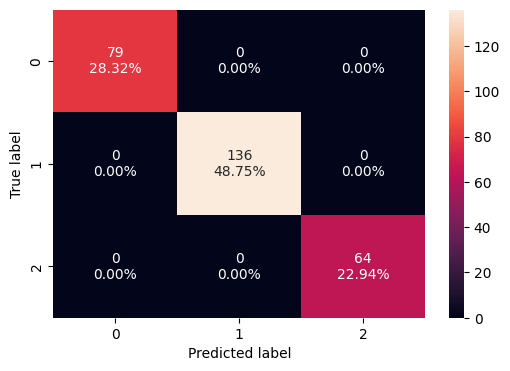

In [ ]:
confusion_matrix_sklearn(rf_bow, X_train_bow, y_train_bow)

Model trained well on training data with no misclassifications

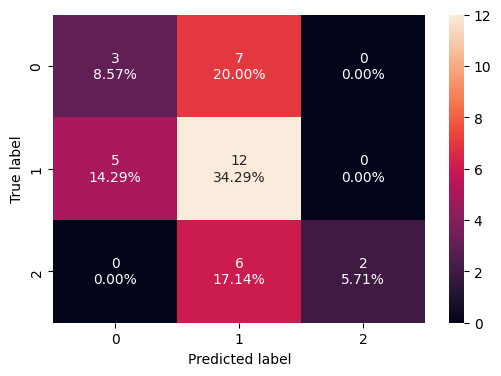

In [ ]:
confusion_matrix_sklearn(rf_bow, X_valid_bow, y_valid_bow)

On validation data we see that the model is clearly overfitting. Lets look at the classification reports

In [ ]:
# Predicting on train data
y_pred_train_bow = rf_bow.predict(X_train_bow)

# Predicting on validation data
y_pred_valid_bow = rf_bow.predict(X_valid_bow)

In [ ]:
print(classification_report(y_train_bow, y_pred_train_bow))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        79
           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00        64

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



Model trained well on training data with no misclassifications

In [ ]:
print(classification_report(y_valid_bow, y_pred_valid_bow))

              precision    recall  f1-score   support

          -1       0.38      0.30      0.33        10
           0       0.48      0.71      0.57        17
           1       1.00      0.25      0.40         8

    accuracy                           0.49        35
   macro avg       0.62      0.42      0.43        35
weighted avg       0.57      0.49      0.46        35



we see that the model performace is not good with a low accuracy and low f1 score. This is understandble as we dont have enough data to train our models

###Random Forest Model (default with Word2Vec)

In [ ]:
# Building the model
rf_w2V = RandomForestClassifier(random_state = 42)

# Fitting on train data
rf_w2V.fit(X_train_word2vec, y_train_word2vec)

RandomForestClassifier(random_state=42)

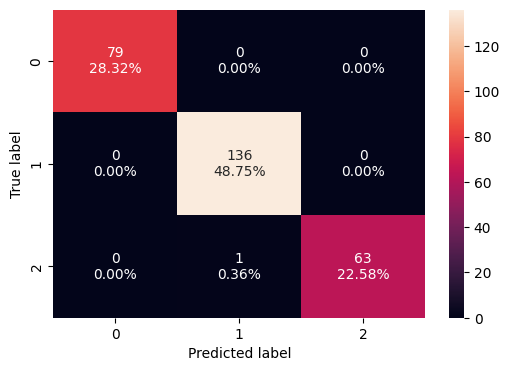

In [ ]:
confusion_matrix_sklearn(rf_w2V, X_train_word2vec, y_train_word2vec)

Model trained well on training data with no misclassifications

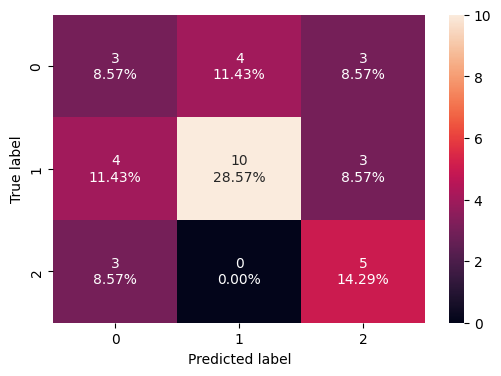

In [ ]:
confusion_matrix_sklearn(rf_w2V, X_valid_word2vec, y_valid_word2vec)

In [ ]:
# Predicting on train data
y_pred_train_word2vec = rf_w2V.predict(X_train_word2vec)

# Predicting on validation data
y_pred_valid_word2vec = rf_w2V.predict(X_valid_word2vec)

In [ ]:
print(classification_report(y_train_word2vec, y_pred_train_word2vec))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        79
           0       0.99      1.00      1.00       136
           1       1.00      0.98      0.99        64

    accuracy                           1.00       279
   macro avg       1.00      0.99      1.00       279
weighted avg       1.00      1.00      1.00       279



Model trained well on training data with no misclassifications

In [ ]:
print(classification_report(y_valid_word2vec, y_pred_valid_word2vec))

              precision    recall  f1-score   support

          -1       0.30      0.30      0.30        10
           0       0.71      0.59      0.65        17
           1       0.45      0.62      0.53         8

    accuracy                           0.51        35
   macro avg       0.49      0.50      0.49        35
weighted avg       0.54      0.51      0.52        35



we see that the model performace is not good with a low accuracy and low f1 score. This is understandble as we dont have enough data to train our models

###Random Forest Model (Base Model with GloVe)

In [ ]:
# Building the model
rf_gl = RandomForestClassifier(random_state = 42)

# Fitting on train data
rf_gl.fit(X_train_glove, y_train_glove)

RandomForestClassifier(random_state=42)

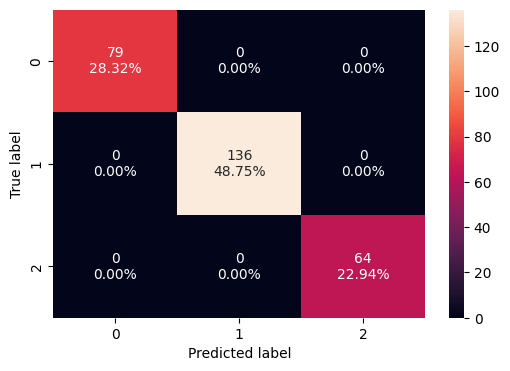

In [ ]:
confusion_matrix_sklearn(rf_gl, X_train_glove, y_train_glove)

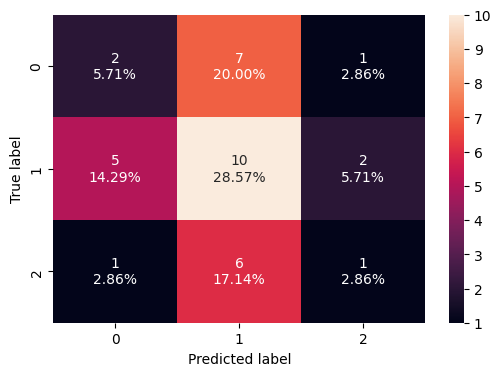

In [ ]:
confusion_matrix_sklearn(rf_gl, X_valid_glove, y_valid_glove)

In [ ]:
# Predicting on train data
y_pred_train_glove = rf_gl.predict(X_train_glove)

# Predicting on validation data
y_pred_valid_glove = rf_gl.predict(X_valid_glove)

In [ ]:
print(classification_report(y_train_glove, y_pred_train_glove))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        79
           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00        64

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



In [ ]:
print(classification_report(y_valid_glove, y_pred_valid_glove))

              precision    recall  f1-score   support

          -1       0.25      0.20      0.22        10
           0       0.43      0.59      0.50        17
           1       0.25      0.12      0.17         8

    accuracy                           0.37        35
   macro avg       0.31      0.30      0.30        35
weighted avg       0.34      0.37      0.34        35



we see that the model performace is not good with a low accuracy and low f1 score. This is understandble as we dont have enough data to train our models.

###Sentence Transformer

In [ ]:
# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

In [ ]:
st_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import time as time

Lets now split the data into test, validation and train format and then convert the data into encoded format using encode() method of the SentenceTransformer model for generating the embeddings for the data sets

In [ ]:
# encoding the dataset
X_train,X_val,X_test,y_train,y_valid,y_test=split(df,y)
start = time.time()

X_train_st = st_model.encode(X_train["News"].values, show_progress_bar=True, device=device)
X_val_st = st_model.encode(X_val["News"].values, show_progress_bar=True, device=device)
X_test_st = st_model.encode(X_test["News"].values, show_progress_bar=True, device=device)

end = time.time()
print("Time taken ",(end-start))

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Time taken  0.45503950119018555


In [ ]:
print('Shapes ', X_train_st.shape, X_val_st.shape, X_test_st.shape)

Shapes  (279, 384) (35, 384) (35, 384)


The vector size for the word embeddings is 384

In [ ]:
X_train_st

array([[-0.021889  , -0.05954399,  0.05725745, ..., -0.03365795,
        -0.01271538, -0.00252113],
       [-0.00863447,  0.0016071 ,  0.00308511, ..., -0.05170009,
        -0.02573155, -0.02247901],
       [ 0.02884934, -0.04085262,  0.10424312, ..., -0.10173862,
         0.08253349, -0.02400402],
       ...,
       [-0.08564059,  0.05434563,  0.09832323, ...,  0.03306371,
         0.00871096,  0.05164941],
       [ 0.01761835, -0.0409635 ,  0.03479602, ..., -0.09519161,
        -0.02552547,  0.0518987 ],
       [ 0.04570828, -0.04488979, -0.00038168, ..., -0.08263782,
         0.03671709,  0.00967833]], dtype=float32)

In [ ]:
rf_st= RandomForestClassifier(random_state = 42)

# Fitting on train data
rf_st.fit(X_train_st, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
X_train_st =pd.DataFrame(X_train_st)
X_val_st =pd.DataFrame(X_val_st)
X_test_st =pd.DataFrame(X_test_st)

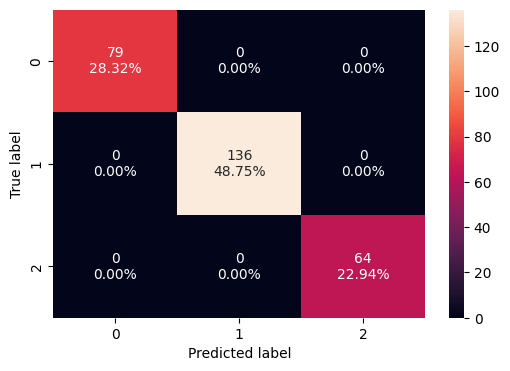

In [ ]:
confusion_matrix_sklearn(rf_st, X_train_st, y_train)

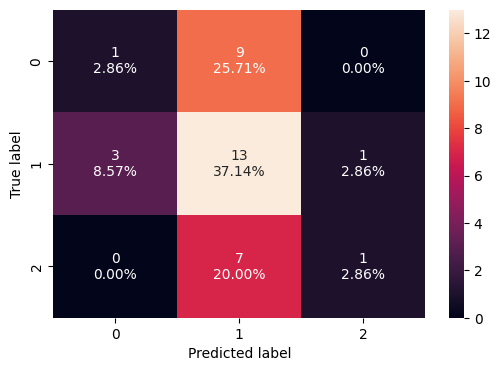

In [ ]:
confusion_matrix_sklearn(rf_st, X_val_st, y_valid)

In [ ]:
# Predicting on train data
y_pred_train_st = rf_st.predict(X_train_st)

# Predicting on validation data
y_pred_valid_st = rf_st.predict(X_val_st)

In [ ]:
print(classification_report(y_train, y_pred_train_st))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        79
           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00        64

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



In [ ]:
print(classification_report(y_valid, y_pred_valid_st))

              precision    recall  f1-score   support

          -1       0.25      0.10      0.14        10
           0       0.45      0.76      0.57        17
           1       0.50      0.12      0.20         8

    accuracy                           0.43        35
   macro avg       0.40      0.33      0.30        35
weighted avg       0.40      0.43      0.36        35



As with all previous models the random forest model we used to predict the news label is over fitting and not generalising well

## **Sentiment Analysis**

We will not try the GridSearchCV method to finetume the Random Forest models earlier using hyperparameter tunings

###Random Forest (Tuned with class_weights and BOW)

In [ ]:
# Choose the type of classifier
rf_tuned = RandomForestClassifier(class_weight="balanced", random_state=42)

# defining the hyperparameter grid for tuning
parameters = {
    "max_depth": list(np.arange(4, 15, 2)),
    "max_features": ["sqrt", 0.5, 0.7],
    "min_samples_split": [5, 6, 7],
    "n_estimators": np.arange(30, 110, 10),
}

# defining the type of scoring used to compare parameter combinations
# we need to specify the mechanism of averaging as we have more than 2 target classes
scorer = metrics.make_scorer(metrics.recall_score, average='weighted')

# running the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_bow, y_train_bow)


In [ ]:
# Creating a new model with the best combination of parameters
rf_bow_tuned = grid_obj.best_estimator_

# Fit the new model to the data
rf_bow_tuned.fit(X_train_bow, y_train_bow)

RandomForestClassifier(class_weight='balanced', max_depth=12, max_features=0.7,
                       min_samples_split=5, n_estimators=80, random_state=42)

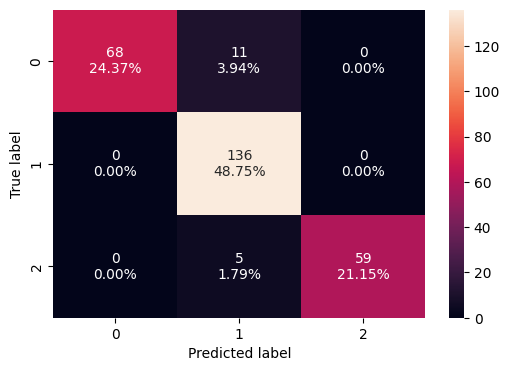

In [ ]:
confusion_matrix_sklearn(rf_bow_tuned, X_train_bow, y_train_bow)

The training model has lost some accuracy than the previous untuned model

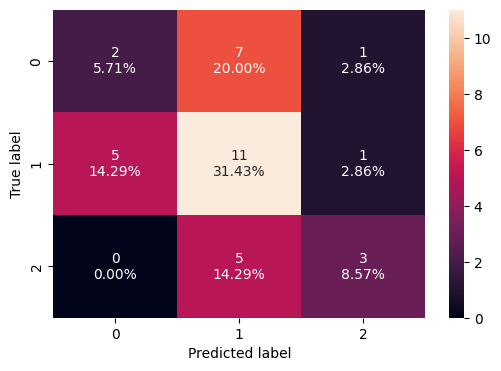

In [ ]:
confusion_matrix_sklearn(rf_bow_tuned, X_valid_bow, y_valid_bow)

In [ ]:
# Predicting on train data
y_pred_train_bow = rf_bow_tuned.predict(X_train_bow)

# Predicting on validation data
y_pred_valid_bow = rf_bow_tuned.predict(X_valid_bow)

In [ ]:
print(classification_report(y_train_bow, y_pred_train_bow))

              precision    recall  f1-score   support

          -1       1.00      0.86      0.93        79
           0       0.89      1.00      0.94       136
           1       1.00      0.92      0.96        64

    accuracy                           0.94       279
   macro avg       0.96      0.93      0.94       279
weighted avg       0.95      0.94      0.94       279



In [ ]:
print(classification_report(y_valid_bow, y_pred_valid_bow))

              precision    recall  f1-score   support

          -1       0.29      0.20      0.24        10
           0       0.48      0.65      0.55        17
           1       0.60      0.38      0.46         8

    accuracy                           0.46        35
   macro avg       0.45      0.41      0.42        35
weighted avg       0.45      0.46      0.44        35



The model accuracy did not change significantly

###Random Forest (Tuned with classweights and Word2Vec)

In [ ]:
# Choose the type of classifier
rf_tuned = RandomForestClassifier(class_weight="balanced", random_state=42)

# defining the hyperparameter grid for tuning
parameters = {
    "max_depth": list(np.arange(4, 15, 2)),
    "max_features": ["sqrt", 0.5, 0.7],
    "min_samples_split": [5, 6, 7],
    "n_estimators": np.arange(30, 110, 10),
}

# defining the type of scoring used to compare parameter combinations
# we need to specify the mechanism of averaging as we have more than 2 target classes
scorer = metrics.make_scorer(metrics.recall_score, average='weighted')

# running the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_word2vec, y_train_word2vec)


In [ ]:
# Creating a new model with the best combination of parameters
rf_word2vec_tuned = grid_obj.best_estimator_

# Fit the new model to the data
rf_word2vec_tuned.fit(X_train_word2vec, y_train_word2vec)

RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=5, n_estimators=90, random_state=42)

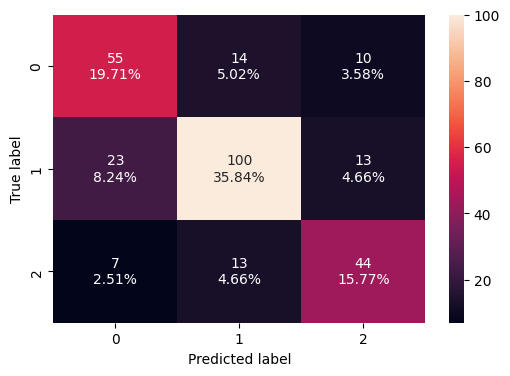

In [ ]:
confusion_matrix_sklearn(rf_word2vec_tuned, X_train_word2vec, y_train_word2vec)

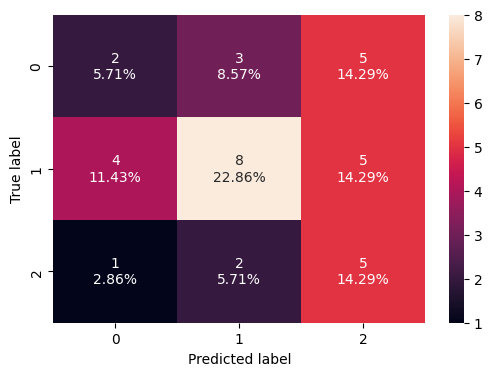

In [ ]:
confusion_matrix_sklearn(rf_word2vec_tuned, X_valid_word2vec, y_valid_word2vec)

In [ ]:
# Predicting on train data
y_pred_train_word2vec = rf_word2vec_tuned.predict(X_train_word2vec)

# Predicting on validation data
y_pred_valid_word2vec = rf_word2vec_tuned.predict(X_valid_word2vec)

In [ ]:
print(classification_report(y_train_word2vec, y_pred_train_word2vec))

              precision    recall  f1-score   support

          -1       0.65      0.70      0.67        79
           0       0.79      0.74      0.76       136
           1       0.66      0.69      0.67        64

    accuracy                           0.71       279
   macro avg       0.70      0.71      0.70       279
weighted avg       0.72      0.71      0.71       279



In [ ]:
print(classification_report(y_valid_word2vec, y_pred_valid_word2vec))

              precision    recall  f1-score   support

          -1       0.29      0.20      0.24        10
           0       0.62      0.47      0.53        17
           1       0.33      0.62      0.43         8

    accuracy                           0.43        35
   macro avg       0.41      0.43      0.40        35
weighted avg       0.46      0.43      0.43        35



###Random Forest (Tuned with classweights and GloVe)

In [ ]:
# Choose the type of classifier
rf_tuned = RandomForestClassifier(class_weight="balanced", random_state=42)

# defining the hyperparameter grid for tuning
parameters = {
    "max_depth": list(np.arange(4, 15, 2)),
    "max_features": ["sqrt", 0.5, 0.7],
    "min_samples_split": [5, 6, 7],
    "n_estimators": np.arange(30, 110, 10),
}

# defining the type of scoring used to compare parameter combinations
# we need to specify the mechanism of averaging as we have more than 2 target classes
scorer = metrics.make_scorer(metrics.recall_score, average='weighted')

# running the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_glove, y_train_glove)

In [ ]:
# Creating a new model with the best combination of parameters
rf_glove_tuned = grid_obj.best_estimator_

# Fit the new model to the data
rf_glove_tuned.fit(X_train_glove, y_train_glove)

RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=7, n_estimators=40, random_state=42)

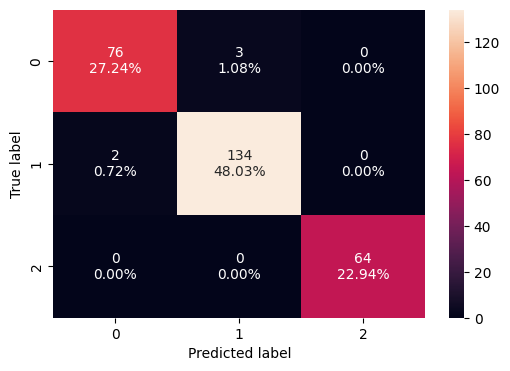

In [ ]:
#Printing the confusion matrix
confusion_matrix_sklearn(rf_glove_tuned, X_train_glove, y_train_glove)

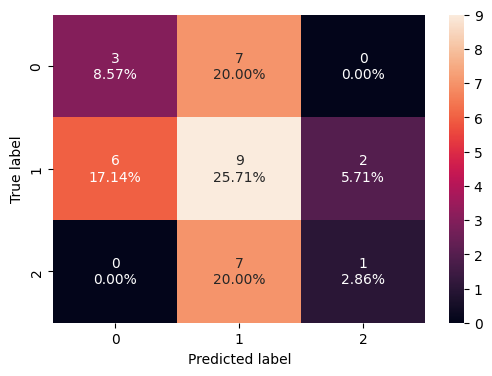

In [ ]:
#Printing the confusion matrix
confusion_matrix_sklearn(rf_glove_tuned, X_valid_glove, y_valid_glove)

In [ ]:
# Predicting on train data
y_pred_train_glove = rf_glove_tuned.predict(X_train_glove)

# Predicting on validation data
y_pred_valid_glove = rf_glove_tuned.predict(X_valid_glove)

In [ ]:
#Printing
print(classification_report(y_train_glove, y_pred_train_glove))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.97        79
           0       0.98      0.99      0.98       136
           1       1.00      1.00      1.00        64

    accuracy                           0.98       279
   macro avg       0.98      0.98      0.98       279
weighted avg       0.98      0.98      0.98       279



In [ ]:
print(classification_report(y_valid_glove, y_pred_valid_glove))

              precision    recall  f1-score   support

          -1       0.33      0.30      0.32        10
           0       0.39      0.53      0.45        17
           1       0.33      0.12      0.18         8

    accuracy                           0.37        35
   macro avg       0.35      0.32      0.32        35
weighted avg       0.36      0.37      0.35        35



### Random Forest(Tuned with class weights and Sentence Tranformer)

In [ ]:
# Choose the type of classifier
rf_tuned = RandomForestClassifier(class_weight="balanced", random_state=42)

# defining the hyperparameter grid for tuning
parameters = {
    "max_depth": list(np.arange(4, 15, 2)),
    "max_features": ["sqrt", 0.5, 0.7],
    "min_samples_split": [5, 6, 7],
    "n_estimators": np.arange(30, 110, 10),
}

# defining the type of scoring used to compare parameter combinations
# we need to specify the mechanism of averaging as we have more than 2 target classes
scorer = metrics.make_scorer(metrics.recall_score, average='weighted')

# running the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_st, y_train)

In [ ]:
# Creating a new model with the best combination of parameters
rf_st_tuned = grid_obj.best_estimator_

# Fit the new model to the data
rf_st_tuned.fit(X_train_st, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_split=5, n_estimators=80, random_state=42)

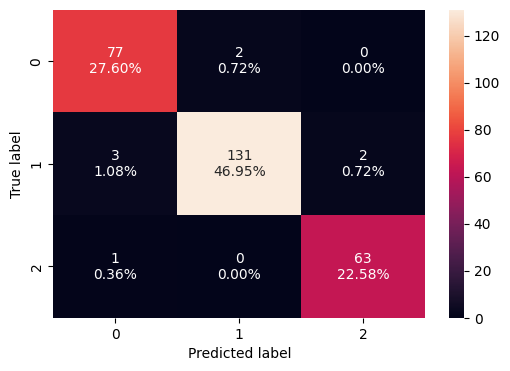

In [ ]:
#Printing the confusion matrix
confusion_matrix_sklearn(rf_st_tuned, X_train_st, y_train)

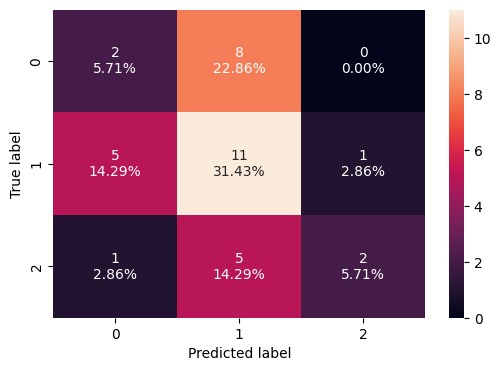

In [ ]:
#Printing the confusion matrix
confusion_matrix_sklearn(rf_st_tuned, X_val_st, y_valid)

In [ ]:
# Predicting on train data
y_pred_train_st = rf_st_tuned.predict(X_train_st)

# Predicting on validation data
y_pred_valid_st = rf_st_tuned.predict(X_val_st)

In [ ]:
#Printing
print(classification_report(y_train, y_pred_train_st))

              precision    recall  f1-score   support

          -1       0.95      0.97      0.96        79
           0       0.98      0.96      0.97       136
           1       0.97      0.98      0.98        64

    accuracy                           0.97       279
   macro avg       0.97      0.97      0.97       279
weighted avg       0.97      0.97      0.97       279



In [ ]:
print(classification_report(y_valid, y_pred_valid_st))

              precision    recall  f1-score   support

          -1       0.25      0.20      0.22        10
           0       0.46      0.65      0.54        17
           1       0.67      0.25      0.36         8

    accuracy                           0.43        35
   macro avg       0.46      0.37      0.37        35
weighted avg       0.45      0.43      0.41        35



##Model Selection

All the models generated so far are poor and do not generalise well at all and I wouldnt recommend any one of them for production use. They need more data for better training. However, The bag of words is the least evil of these all. Lets use for academic reasons!

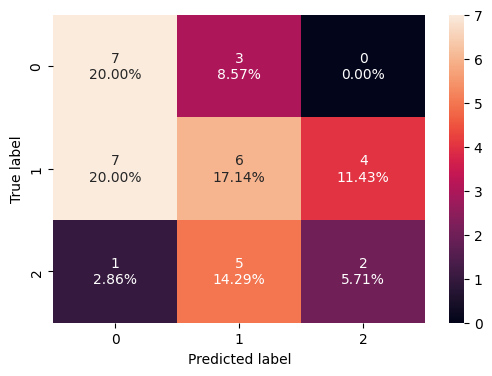

In [ ]:
confusion_matrix_sklearn(rf_bow_tuned, X_test_bow, y_test_bow)

In [ ]:
# Predicting on test data
y_pred_test_bow = rf_bow_tuned.predict(X_test_bow)

In [ ]:
print(classification_report(y_test_bow, y_pred_test_bow))

              precision    recall  f1-score   support

          -1       0.47      0.70      0.56        10
           0       0.43      0.35      0.39        17
           1       0.33      0.25      0.29         8

    accuracy                           0.43        35
   macro avg       0.41      0.43      0.41        35
weighted avg       0.42      0.43      0.41        35



The model performance on test data for this model is in line with the validation data. The model is not generalising well. We could try and use some other deep learning or advanced ML technique to improve the model performance but I guess the primary reason for poor model performance is lack of enough training data

## **Weekly News Summarization**

**Important Note**: It is recommended to run this section of the project independently from the previous sections in order to avoid runtime crashes due to RAM overload.

#### Installing and Importing the necessary libraries

In [ ]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
#!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 132.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 281.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 324.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 268.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible

In [ ]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

#### Loading the data

Load the data again; Lets treat this as a saperate exercise

In [ ]:
data=pd.read_csv('/content/stock_news.csv')

In [ ]:
data_bak=data.copy()

In [ ]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

#### Loading the model

In [ ]:
# Using hf_hub_download to download a model from the Hugging Face model hub
# The repo_id parameter specifies the model name or path in the Hugging Face repository
# The filename parameter specifies the name of the file to download
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [ ]:
llm = Llama(
    model_path=model_path,
    n_gpu_layers = 200,
    n_ctx=4500,
)

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


#### Aggregating the data weekly

In [ ]:
data["Date"] = pd.to_datetime(data['Date'])  # Convert the 'Date' column to datetime format.

In [ ]:
# Group the data by week using the 'Date' column.
weekly_grouped = data.groupby(pd.Grouper(key='Date', freq='W'))

In [ ]:
weekly_grouped.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1
...,...,...,...,...,...,...,...,...
337,2019-04-29,Spotify reported better-than-expected Q1 reve...,51.099998,51.492500,50.965000,49.665138,88818800,1
338,2019-04-29,The S&P 500 reached a new intraday record hig...,51.099998,51.492500,50.965000,49.665138,88818800,1
339,2019-04-29,This news article reports on Spotify's first ...,51.099998,51.492500,50.965000,49.665138,88818800,0
340,2019-04-30,The Czech Finance Ministry is finalizing plan...,50.764999,50.849998,49.777500,48.708790,186139600,0


In [ ]:
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


In [ ]:
weekly_grouped

,Date,News
0,2019-01-06,The tech sector experienced a significant dec...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...
2,2019-01-20,The U.S. stock market declined on Monday as c...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...
5,2019-02-10,"The Dow Jones Industrial Average, S&P 500, an..."
6,2019-02-17,"This week, the European Union's second highes..."
7,2019-02-24,This news article discusses progress towards ...
8,2019-03-03,The Dow Jones Industrial Average and other ma...
9,2019-03-10,"Spotify, the world's largest paid music strea..."


In [ ]:
# creating a copy of the data
data_1 = weekly_grouped.copy()

#### Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

  - **Example**: `You are an expert data analyst specializing in news content analysis.`

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

  - **Example**: `Analyze the provided news headline and return the main topics contained within it.`

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

  - **Example**:

```
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.
```

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output

  - **Example**: `Return the output in JSON format with keys as the topic number and values as the actual topic.`

**Full Prompt Example**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Sample Output**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

##### Utility Functions

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

##### Defining the response function

In [ ]:
#Defining the response function
def response_mistral_1(prompt, news):
    model_output = llm(
      f"""
      [INST]
      {prompt}
      News Articles: {news}
      [/INST]
      """,
      max_tokens=300,
      temperature=0, #Complete the code to set the value for temperature.
      top_p=0.95, #Complete the code to set the value for top_p
      top_k=50, #Complete the code to set the value for top_k
      echo=False
#      seed=42
    )

    final_output = model_output["choices"][0]["text"]

    return final_output

##### Checking the model output on a sample

**Note**: Use this section to test out the prompt with one instance before using it for the entire weekly data.

In [ ]:
# defining the instructions for the model
instructions = """
You are an expert data analyst specializing in news content analysis for stock market. You are given multiple news seggregated using the '||' delimiter

Task: Your task is to identify the top three positive and negative events from the week that are likely to impact the stock price. Analyze the provided news content and Classify the sentiment of the provided news into the following categories:
    - Positive
    - Negative
    - Neutral
Return the output in JSON format only.
"""

In [ ]:
news = data.loc[0, 'News']

In [ ]:
print(len(news.split(' ')))
news

46


" The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple's downward revision of its revenue expectations for the quarter, previously announced in January."

In [ ]:
model_resp= response_mistral_1(instructions, news)

In [ ]:
print(model_resp)

 {
         "sentiment": "Negative",
         "events": [
           {
             "event": "Apple's Q1 revenue warning",
             "impact": "Significant decline in tech sector stocks, including suppliers to Apple"
           },
           {
             "event": "Downward revision of Apple's revenue expectations for the quarter",
             "impact": "Caused notable suppliers to experience stock price drops"
           }
         ]
       }


##### Checking the model output on the weekly data

In [ ]:
data['model_response'] = data['News'].apply(lambda x: response_mistral_1(instructions, x))

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.gene

In [ ]:
data.head()

,Date,News,Open,High,Low,Close,Volume,Label,model_response
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1,"{\n ""sentiment"": ""Negative"",\n ..."
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1,"{\n ""news_articles"": [\n ..."
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1,"{\n ""news_articles"": [\n ..."
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1,"{\n ""news_articles"": [\n {\..."
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1,"{\n ""news_articles"": [\n {\..."


Lets take a random respose and see if the Llama model returned the correct encoding

In [ ]:
data['model_response'][5]

' {\n         "news_articles": [\n           {\n             "title": "Apple CEO Tim Cook discusses Q1 warning and US-China trade tensions on CNBC",\n             "sentiment": "Negative",\n             "events": [\n               "Apple CEO Tim Cook attributed US-China trade tensions as a factor in the company\'s Q1 warning.",\n               "Cook did not mention iPhone unit sales specifically but indicated Apple may comment on them again."\n             ]\n           },\n           {\n             "title": "",\n             "sentiment": "Neutral",\n             "events": [\n               "Apple Services revenue is projected to exceed $10.8 billion in Q1."\n             ]\n           },\n           {\n             "title": "",\n             "sentiment": "Positive",\n             "events": [\n               "Services revenue is a positive sign for Apple as it continues to grow and diversify its revenue streams.",\n               ""\n             ]\n           }\n         ],\n         

Yes the correct sentiments is being read!

##### Formatting the model output

In [ ]:
data['model_response_clean'] = data['model_response'].apply(extract_json_data)

Error parsing JSON: Expecting ',' delimiter: line 25 column 13 (char 1195)
Error parsing JSON: Expecting ',' delimiter: line 25 column 13 (char 949)
Error parsing JSON: Expecting ',' delimiter: line 17 column 13 (char 1106)
Error parsing JSON: Expecting ',' delimiter: line 30 column 14 (char 994)
Error parsing JSON: Expecting ',' delimiter: line 28 column 14 (char 1078)
Error parsing JSON: Expecting ',' delimiter: line 23 column 14 (char 1337)
Error parsing JSON: Expecting value: line 14 column 12 (char 548)
Error parsing JSON: Expecting ',' delimiter: line 16 column 13 (char 945)
Error parsing JSON: Expecting ',' delimiter: line 26 column 14 (char 949)
Error parsing JSON: Expecting ',' delimiter: line 37 column 13 (char 1090)
Error parsing JSON: Expecting value: line 12 column 12 (char 403)
Error parsing JSON: Expecting ',' delimiter: line 20 column 14 (char 1034)
Error parsing JSON: Expecting ',' delimiter: line 30 column 14 (char 1004)
Error parsing JSON: Expecting ',' delimiter: li

The provided method extract_jason_data seem to be not parsing the JSON returned by model correctly. Lets read the top 5 again

In [ ]:
data.head()

,Date,News,Open,High,Low,Close,Volume,Label,model_response,model_response_clean
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1,"{\n ""sentiment"": ""Negative"",\n ...","{'sentiment': 'Negative', 'events': [{'event':..."
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1,"{\n ""news_articles"": [\n ...",{'news_articles': [{'title': 'Apple lowers fis...
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1,"{\n ""news_articles"": [\n ...",{'news_articles': [{'title': 'Apple cuts fisca...
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1,"{\n ""news_articles"": [\n {\...",{}
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1,"{\n ""news_articles"": [\n {\...",{'news_articles': [{'title': 'Apple's revenue ...


In [ ]:
data.shape

(349, 10)

In [ ]:
model_response_parsed = pd.json_normalize(data['model_response_clean'])

In [ ]:
model_response_parsed.tail()

,sentiment,events,news_articles,top_three_negative_events,top_three_positive_events,neutral_events,top_three_events,weekly_events,message,weekly_news,...,articles,top_three_neutral,top_positive_events,top_negative_events,neutral_articles,analysis.sentiments.Positive,analysis.sentiments.Negative,analysis.sentiments.Neutral,analysis.events,sentiment_analysis
344,NaN,NaN,[{'title': 'Oprah Winfrey considering Democrat...,[],[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345,NaN,NaN,"[{'title': 'European shares fell on Tuesday', ...","[{'event': 'European shares fell on Tuesday', ...",[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,NaN,NaN,NaN,NaN,NaN,NaN,[{'event': 'Apple's earnings report exceeded e...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[{'article': 'The Federal Reserve is anticipat...
348,NaN,NaN,[{'title': 'South Korea's Samsung Electronics ...,[{'event': 'Samsung Electronics reported its w...,[],[],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Conclusions and Recommendations**

* The Data provided is too small to conduct any meaniningful analysis.
* All the models generated were overfitting even after tuning. This is due to point 1 above.
* We could have tried other ML models such as Adaboost, XGboost or some other mechanism to improve the performance but that wouldnt have changed the model performance significatly
* I recommend that we have significantly more data to be able to do some meaningful exercise.
* The Bag of words technique for word embeddings seemed to perform best amongst all the models trained.
* The Mistral model used to derive sentiments is time consuming but generates the outputs pretty accurately, reiniforcing superiority of the transfomer based architecture.


<font size=6 color='blue'>Power Ahead</font>
___